In [1]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566164 sha256=f732e9387c1868a5070ede54ff0277a1dc342f359fbcf68620a41300ffa898ae
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


Training Images

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display
from google.colab.patches import cv2_imshow
import cv2
from datetime import datetime

face_1 = face_recognition.load_image_file("/content/drive/MyDrive/IMG-20240718-WA0000.jpg")
face_1_encoding = face_recognition.face_encodings(face_1)[0]

face_2 = face_recognition.load_image_file("/content/drive/MyDrive/IMG-20240718-WA0003.jpg")
face_2_encoding = face_recognition.face_encodings(face_2)[0]


known_face_encodings = [
    face_1_encoding,
    face_2_encoding
]
known_face_names = [
    "Sagar",
    "Tarun"
]
print("Done learning and creating profiles")

Done learning and creating profiles


In [5]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


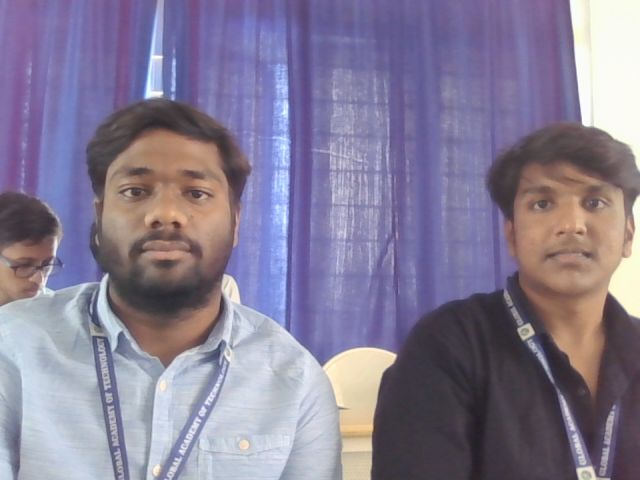

In [8]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [9]:
from PIL import Image
image = Image.open('photo.jpg')

print(image.size)

(640, 480)


Performing Face Recognition

Tarun
Sagar


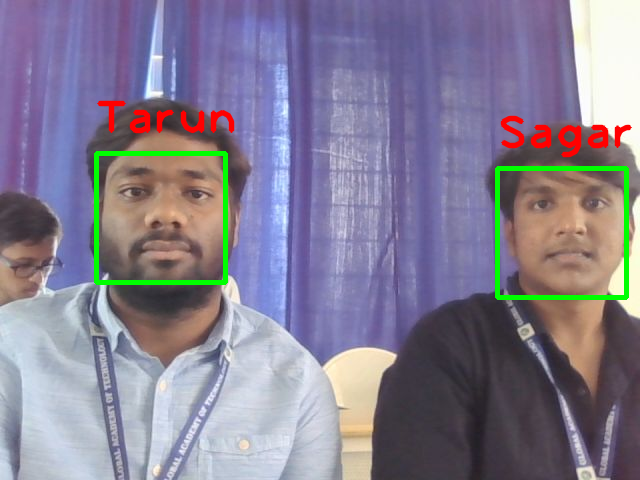

In [10]:
result = []
file_name = "photo.jpg"
unknown_image = face_recognition.load_image_file(file_name)
unknown_image_to_draw = cv2.imread(file_name)

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    cv2.rectangle(unknown_image_to_draw,(left, top), (right, bottom), (0,255,0),3 )
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255))
    cv2.putText(unknown_image_to_draw,name,(left,top-20), cv2.FONT_HERSHEY_PLAIN,3, (	0, 0, 255), 3,cv2.LINE_AA)

    print(name)

    result.append(name)
cv2_imshow(unknown_image_to_draw)

In [11]:
for i in result:
    print(i)

Tarun
Sagar


In [12]:
import pandas as pd

result  # Example list of names

# Create a DataFrame from the list
df = pd.DataFrame(result, columns=["Name"])

# Save the DataFrame to an Excel file
file_path = "attendance.xlsx"  # Path to save the Excel file
df.to_excel(file_path, index=False)

print("Names saved to Excel successfully.")

Names saved to Excel successfully.
